<a href="https://colab.research.google.com/github/AmirRazaMBA/TF_786/blob/main/2.%20Convolutional%20Neural%20Network%20in%20Tensorflow/AZ/03_cifar_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2798 - accuracy: 0.5644 - val_loss: 1.0944 - val_accuracy: 0.6185
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8283 - accuracy: 0.7127 - val_loss: 0.9039 - val_accuracy: 0.7045
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6812 - accuracy: 0.7682 - val_loss: 0.6863 - val_accuracy: 0.7685
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5774 - accuracy: 0.8031 - val_loss: 0.7338 - val_accuracy: 0.7505
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4907 - accuracy: 0.8330 - val_loss: 0.7609 - val_accuracy: 0.7699
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4148 - accuracy: 0.8584 - val_loss: 0.6605 - val_accuracy: 0.7895
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3499 - accuracy: 0.8792 - val_loss: 0.6139 - val_accuracy:

In [8]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
print(steps_per_epoch)
history = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

1562
Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.5418 - accuracy: 0.8269 - val_loss: 0.4940 - val_accuracy: 0.8361
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.4380 - accuracy: 0.8557 - val_loss: 0.5126 - val_accuracy: 0.8318
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.4045 - accuracy: 0.8654 - val_loss: 0.4424 - val_accuracy: 0.8489
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3885 - accuracy: 0.8721 - val_loss: 0.4364 - val_accuracy: 0.8548
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3655 - accuracy: 0.8771 - val_loss: 0.4415 - val_accuracy: 0.8515
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3540 - accuracy: 0.8808 - val_loss: 0.4845 - val_accuracy: 0.8442
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3432 - accuracy: 0.8842 - val_loss: 0.4

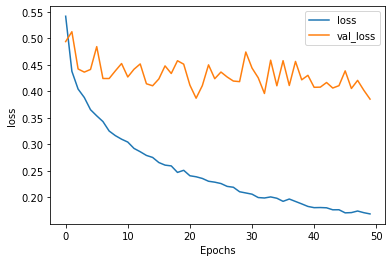

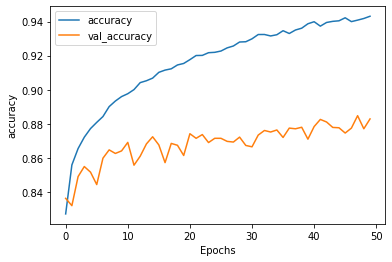

In [9]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1000
           1       0.93      0.95      0.94      1000
           2       0.85      0.84      0.84      1000
           3       0.77      0.77      0.77      1000
           4       0.85      0.88      0.87      1000
           5       0.82      0.82      0.82      1000
           6       0.91      0.91      0.91      1000
           7       0.93      0.90      0.92      1000
           8       0.96      0.93      0.94      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[903   6  30   8  12   3   3   4  20  11]
 [  6 953   1   1   0   2   1   0   3  33]
 [ 22   1 837  36  40  16  29  10   2   7]
 [ 10   3  22 767  34 105  30  16   3  10]
 [  8   0  30  30 880  16  18  16   1   1]
 [  4   3  23  96  28 821 

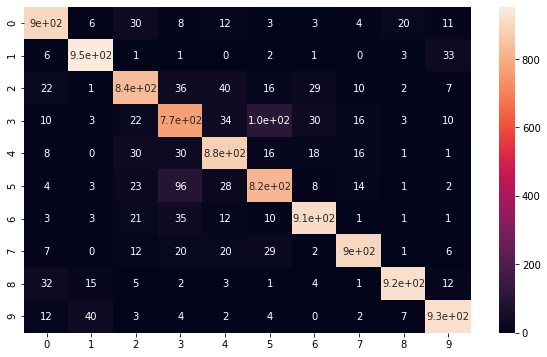

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
y_prediction = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

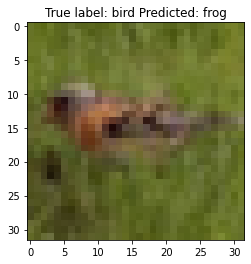

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));